# Word vectors

## Introduction

In this notebook, we will cover:

- Working with pre-trained word embeddings 

- Understanding some applications of working embeddings

- Training word embeddings from co-occurence matrices.

This notebook borrows from multiple sources. But most of these materials are inspired/borrowd from the [Stanford
CS224N: Natural Language Processing with Deep Learning
](https://web.stanford.edu/class/cs224n/)

## Pre-Trained Word Embeddings with Gensim

For looking at word vectors, We will use Gensim. Gensim is an open source python library for natural language processing.  Gensim isn't really a deep learning package. It's a package for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Gensim allow you to either easily train word embeddings via word2vec algorithms, or retrieve pre-trained word embeddings. Gensim provides a library of several sets of word vectors that you can easily load. Here we will work the Glove Embeddings. 


### Glove. 

GloVe, which stands for Global Vectors for Word Representation, is a method created by Pennington and colleagues at Stanford as an improvement on word2vec for learning word embeddings. It’s an unsupervised model that builds word vectors by looking at how often words appear together across an entire text corpus. By using this global co-occurrence information, GloVe produces word vectors that capture interesting relationships and patterns in the vector space.

What makes GloVe unique is that it combines ideas from two approaches: the global perspective of methods like Latent Semantic Analysis (LSA), which rely on matrix factorization, and the local context-based training of word2vec. Instead of just using a sliding window to learn from nearby words, GloVe explicitly constructs a word co-occurrence matrix that reflects word pair frequencies in the whole dataset.

For a detailed explanation, see the original paper by Jeffrey Pennington, Richard Socher, and Christopher D. Manning (2014): GloVe: Global Vectors for Word Representation.(https://nlp.stanford.edu/projects/glove/)


In [2]:
import numpy as np

# Get the interactive Tools for Matplotlib
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# PCA
from sklearn.decomposition import PCA

# Gensim
import gensim.downloader as api
from gensim.models import KeyedVectors

#### Loading Glove Embeddings

In [3]:
model = api.load("glove-wiki-gigaword-100")
print(type(model))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [5]:
# what is this exactly? Check the dimensions. 

# Extract vocabulary size and embedding dimension
vocab_size = len(model)
embedding_dim = model.vector_size

# Build the matrix (rows = vocab, columns = embedding dim)
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fill the matrix
for i, word in enumerate(model.index_to_key):
    embedding_matrix[i] = model[word]

In [6]:
# see dimensions    
print(embedding_matrix.shape)

(400000, 100)


In [7]:
## see what it looks like
embedding_matrix[10:]


array([[-0.14401001,  0.32554001,  0.14257   , ...,  0.25398001,
         1.10780001, -0.073074  ],
       [-1.25569999,  0.61036003,  0.56792998, ..., -1.58770001,
         0.76984   , -0.64998001],
       [-0.093337  ,  0.19043   ,  0.68457001, ..., -0.68175   ,
         0.28804001,  0.54892999],
       ...,
       [ 0.36087999, -0.16919   , -0.32703999, ...,  0.27138999,
        -0.29188001,  0.16109   ],
       [-0.10461   , -0.50470001, -0.49331   , ...,  0.42526999,
        -0.51249999, -0.17054   ],
       [ 0.28365001, -0.62629998, -0.44351   , ...,  0.43678001,
        -0.82607001, -0.15701   ]])

#### Check the vectors for some words

In [8]:
# check some words
model['bread']

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

In [9]:
model['croissant']

array([-0.25144  ,  0.52157  , -0.75452  ,  0.28039  , -0.31388  ,
        0.274    ,  1.1971   , -0.10519  ,  0.82544  , -0.33398  ,
       -0.21417  ,  0.22216  ,  0.14982  ,  0.47384  ,  0.41984  ,
        0.69397  , -0.25999  , -0.44414  ,  0.58296  , -0.30851  ,
       -0.076455 ,  0.33468  ,  0.28055  , -0.99012  ,  0.30349  ,
        0.39128  ,  0.031526 , -0.095395 , -0.004745 , -0.81347  ,
        0.27869  , -0.1812   ,  0.14632  , -0.42186  ,  0.13857  ,
        1.139    ,  0.14925  , -0.051459 ,  0.37875  , -0.2613   ,
        0.011081 , -0.28881  , -0.38662  , -0.3135   , -0.1954   ,
        0.19248  , -0.52995  , -0.40674  , -0.25159  ,  0.06272  ,
       -0.32724  ,  0.28374  , -0.2155   , -0.061832 , -0.50134  ,
        0.0093959,  0.30715  ,  0.3873   , -0.74554  , -0.45947  ,
        0.40032  , -0.1378   , -0.26968  , -0.3946   , -0.64876  ,
       -0.47149  , -0.085536 ,  0.092795 , -0.034018 , -0.61906  ,
        0.19123  ,  0.20563  ,  0.29056  , -0.010908 ,  0.1531

#### Similarity

Gensim has several pre-built functions to work with word vectors. For example, we can easily calculate the similarity between words 

In [10]:
model.most_similar('usa')

[('canada', 0.6544384360313416),
 ('america', 0.645224392414093),
 ('u.s.a.', 0.6184033155441284),
 ('united', 0.6017189621925354),
 ('states', 0.5970699191093445),
 ('australia', 0.5838716626167297),
 ('world', 0.5590084791183472),
 ('2010', 0.5580702424049377),
 ('2012', 0.5504006743431091),
 ('davis', 0.5464468002319336)]

In [11]:
model.most_similar('banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636883735657),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173784255981),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [12]:
model.most_similar('croissant')

[('croissants', 0.6829844117164612),
 ('brioche', 0.6283303499221802),
 ('baguette', 0.5968102812767029),
 ('focaccia', 0.5876684784889221),
 ('pudding', 0.5803956389427185),
 ('souffle', 0.5614769458770752),
 ('baguettes', 0.5558240413665771),
 ('tortilla', 0.5449503064155579),
 ('pastries', 0.5427731275558472),
 ('calzone', 0.5374532341957092)]

#### Most distinct words

In [13]:
model.most_similar(negative='banana')

[('shunichi', 0.49618107080459595),
 ('ieronymos', 0.4736502468585968),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845886707306),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.458895742893219),
 ('ncpa', 0.4577338993549347),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947238922119)]

#### Words Geometry

Word vectors allow operation across words.This is what is called vector arithmetic. 

In [16]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


**What’s happening?**

The model.most_similar() function finds words that are closest (in vector space) to the combination you specify.

Here you’re giving it:

Positive words: ['woman', 'king']

Negative words: ['man']

**Vector Operations**


output= (vector for ’woman’ ) + (vector for ’king’ ) − ( vector for ’man’ )

In [14]:
# write a function
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [15]:
analogy('man', 'king', 'woman')

'queen'

In [16]:
analogy('australia', 'beer', 'france')

'champagne'

In [17]:
analogy('pencil', 'sketching', 'camera')

'photographing'

### Application: The Geometry of Culture: Analyzing the Meanings of Class through Word Embeddings

This simple analogy between word vectors is the core of the method developed in the paper "The Geometry of Culture". The idea here is to build a new vector with positive and negative words, and then project new words over this cultural vector. 

Let's see in code: 

In [28]:
# step 1: define words that identify lower and upper class
upper_class = ['rich', 'manager', 'elite', 'capitalist']
lower_class = ['poor', 'worker', 'laborer', 'socialist']

# Retrieve the vectors of these words
upper_vecs = np.array([model[w] for w in upper_class])
lower_vecs = np.array([model[w] for w in lower_class])

# visualize
print(upper_vecs[0])

[-0.1328     0.92261    0.93544   -0.63118    0.50402   -0.30338
 -0.55406    0.071319  -0.13877    0.11294   -0.30848   -0.35173
  0.27514   -0.015935  -0.19586   -0.26719    0.1023    -1.127
 -0.35836    0.80409   -0.12859    0.15648    0.57618   -0.21437
 -0.029065   0.49854   -0.27588   -0.051191  -0.23875    0.24421
  0.22476    0.070125   0.50378   -1.1223     0.4764    -0.06986
 -0.027617   0.7853    -0.68022   -0.036379   0.37911   -0.93087
 -0.011035  -0.082644  -0.27459    0.09938   -0.26818    0.29252
  0.62947   -0.22741   -0.6275     0.031109  -0.054661   0.16065
 -0.38845   -1.9376    -0.10413   -0.64834    1.4837    -0.13894
 -0.049802   0.55547   -0.21925   -0.90887    1.4822    -0.6478
  1.1769     0.1142     0.33713   -0.7661     0.37561    0.0037597
 -0.28029    0.12944   -0.17194   -0.10839   -0.13159   -0.7647
 -0.17149    0.98379    0.83413    0.53028   -0.46108   -0.59009
 -0.24216    0.18024   -0.28845   -0.40467   -0.65468   -0.79142
  0.33132   -0.52434   -0.2

In [ ]:
### Step 2: Average, Take the Difference, and Normalize the Vector
upper_mean = np.mean(upper_vecs, axis=0)
lower_mean = np.mean(lower_vecs, axis=0)

## Difference
class_vector = upper_mean - lower_mean

## normalize the vectors
class_vector = class_vector / np.linalg.norm(class_vector)

In [33]:
### Step 3: projecting words in the class vectors

## Select some occupations
occupations = ['teacher', 'lawyer', 'janitor', 'nurse',
                'engineer', 'ceo', 'manager', 'cashier',
                'doctor', 'mechanic', 'bartender', 'professor',
                'farmer']

# build an empty list for the projection
projections = []

for job in occupations:
    job_vec = model[job]
    # projection - equal to a cosine similarity because we normalized the vectors
    proj = np.dot(job_vec, class_vector)
    projections.append((job, proj))

# Sort
projections.sort(key=lambda x: x[1])

/Users/tb186/anaconda3/envs/cs224n/lib/python3.12/site-packages/plotnine/_mpl/utils.py:23: UserWarning: Glyph 8594 (\N{RIGHTWARDS ARROW}) missing from font(s) Helvetica.
/Users/tb186/anaconda3/envs/cs224n/lib/python3.12/site-packages/plotnine/ggplot.py:687: UserWarning: Glyph 8594 (\N{RIGHTWARDS ARROW}) missing from font(s) Helvetica.


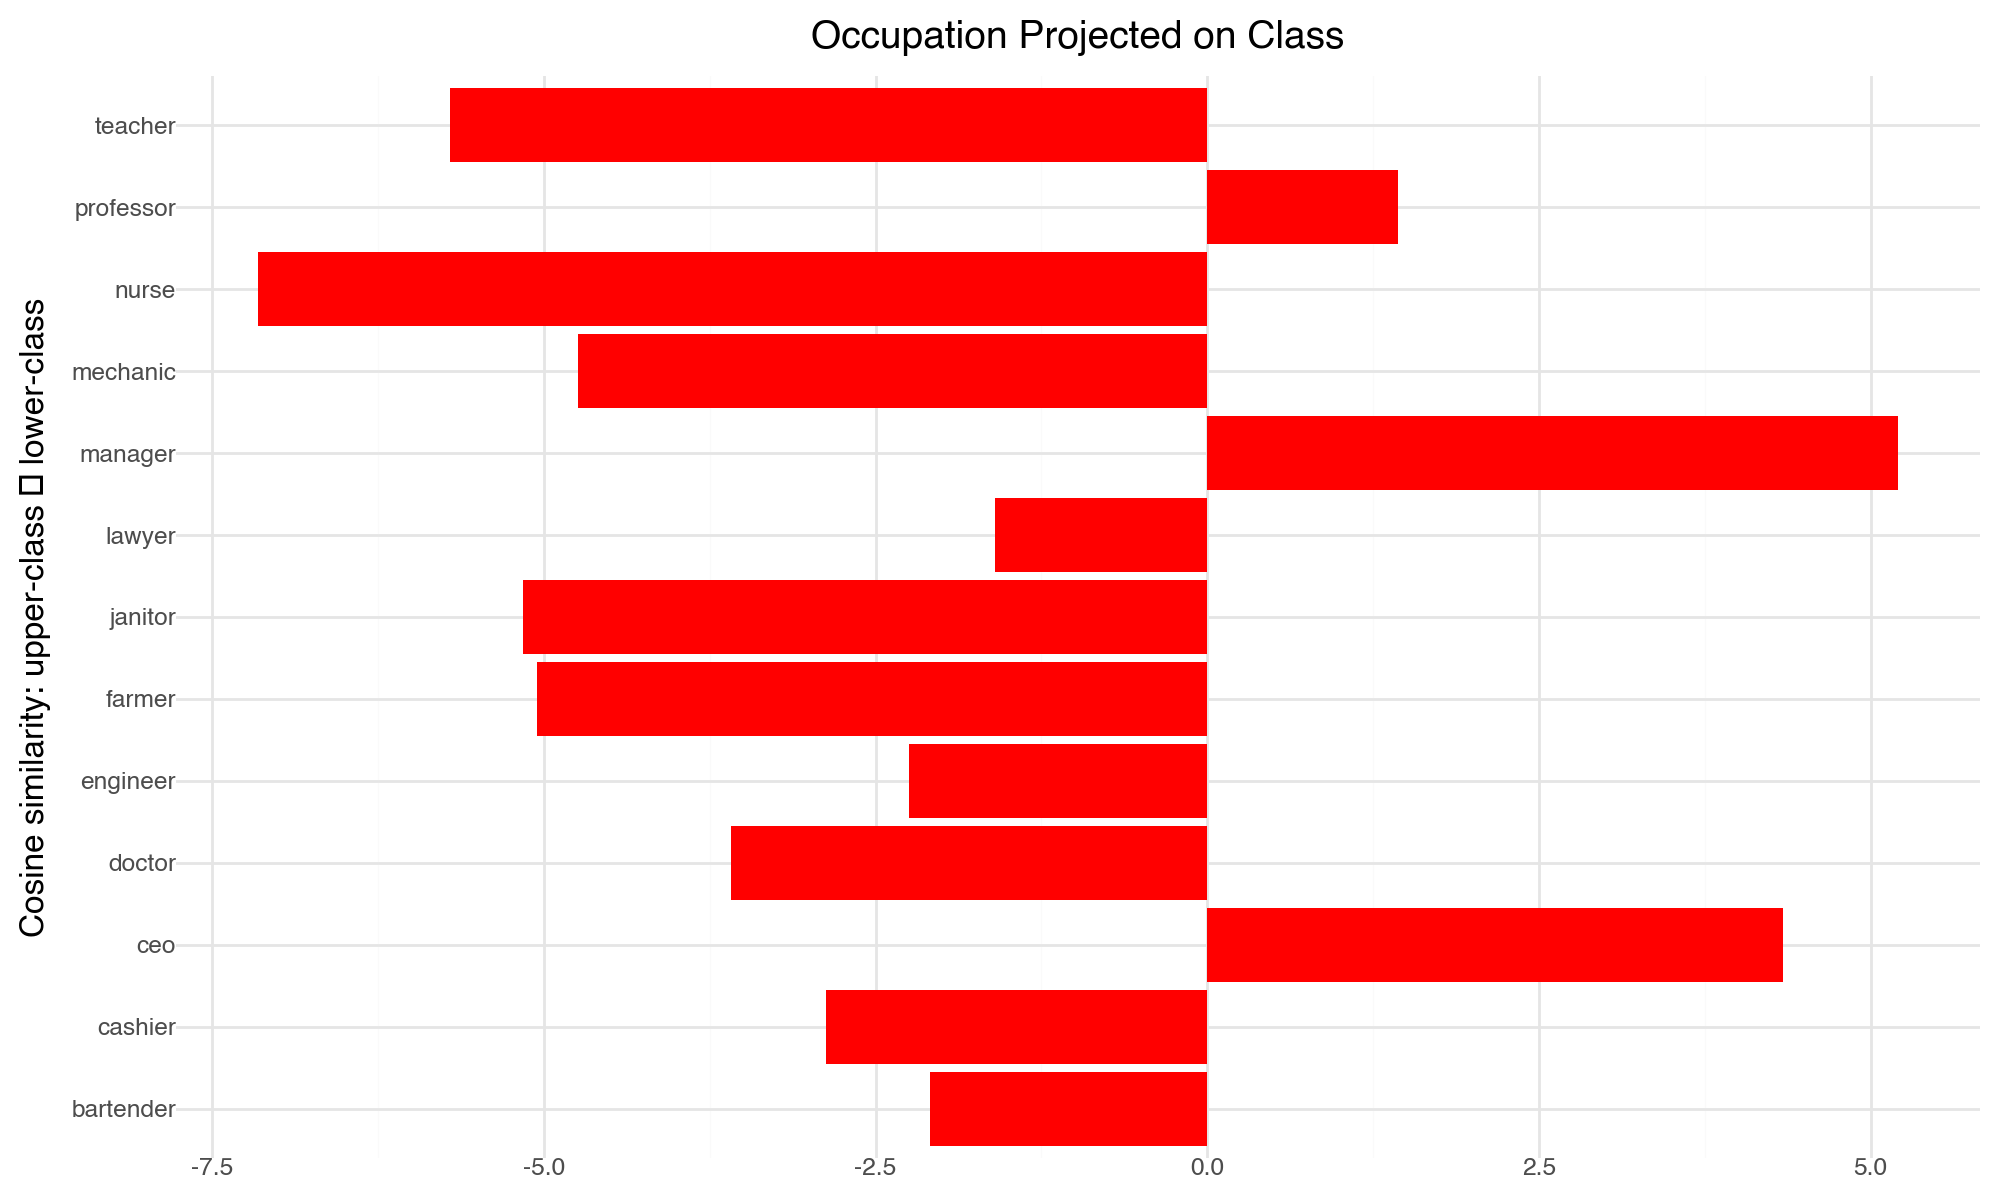

In [47]:
## plot
from plotnine import *
import pandas as pd


# build a datafram
df = pd.DataFrame(projections, columns=['job', 'projection'])

# sort
df = df.sort_values('projection')

# plots

p = (
    ggplot(df, aes(y='projection', x='job'))  # x is projection, y is job
    + geom_col(fill='red')
    + geom_vline(xintercept=0, linetype='dashed', color='black')
    + labs(
        title='Occupation Projected on Class',
        x='Cosine similarity: upper-class → lower-class',
        y=''
    )
    + theme_minimal()
    + theme(
        figure_size=(10, 6),
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        plot_title=element_text(weight='bold', size=14),
    ) +
    coord_flip()
)

p